In [1]:
# Library imports
import pandas as pd
import plotly.express as px
import warnings
from ydata_profiling import ProfileReport

warnings.filterwarnings('ignore')

/opt/anaconda3/envs/test/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/test/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
raw_data = pd.read_csv("Data/final_extracted_terms_and_definitions.csv")
raw_data.head()

,PMID,Title,Verbatim Definition,Term A,Term B,Term C,Term D,Term E,published_year,study_year,definitions
0,35589549,Identifying who has long COVID in the USA: a m...,"However, three N3C sites provided lists of loc...",NaN,NaN,Visit to Long COVID Clinic,NaN,NaN,2022,NaN,Visit to Long COVID Clinic
1,36415203,Vital Measurements of Hospitalized COVID-19 Pa...,"Due to limited documentation of Long COVID, we...",NaN,NaN,NaN,Computaional Phenotype Model based on U09.9 in...,NaN,2022,NaN,Computaional Phenotype Model based on U09.9 in...
2,36563487,Generalisable long COVID subtypes: findings fr...,Patients with U09.9 (Long COVID) diagnosis,ICD-10 : U09.9,NaN,NaN,NaN,NaN,2023,"The data freeze date was August 10, 2022",ICD-10 : U09.9
3,36793086,Coding long COVID: characterizing a new diseas...,"In this retrospective cohort study, we defined...",ICD-10 : U09.9,NaN,NaN,NaN,NaN,2023,NaN,ICD-10 : U09.9
4,3716633,Risk of post-acute sequelae of SARS-CoV-2 infe...,Adult patients with all of the following withi...,NaN,NaN,Visit to Long COVID Clinic,NaN,NaN,2023,2020/03/01 - 2022/02/28,Visit to Long COVID Clinic


In [3]:
# Type conversion of columns
raw_data["PMID"] = raw_data["PMID"].astype(str)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PMID                  21 non-null     object
 1   Title                 21 non-null     object
 2   Verbatim Definition   21 non-null     object
 3   Term A                16 non-null     object
 4   Term B                6 non-null      object
 5   Term C                5 non-null      object
 6   Term D                3 non-null      object
 7   Term E                1 non-null      object
 8   published_year        21 non-null     int64 
 9   study_year            7 non-null      object
 10  definitions           21 non-null     object
dtypes: int64(1), object(10)
memory usage: 1.9+ KB


In [4]:
pdata = raw_data.groupby(by=['published_year','definitions'], as_index= False)["PMID"].count()


In [5]:
pdata.rename(columns= {"PMID":"Count Of Articles"}, inplace= True)
pdata

,published_year,definitions,Count Of Articles
0,2022,Computaional Phenotype Model based on U09.9 in...,1
1,2022,Visit to Long COVID Clinic,1
2,2023,Computaional Phenotype Model based on U09.9 in...,1
3,2023,ICD-10 : U09.9,4
4,2023,"ICD-10 : U09.9, ICD-10 : B94.8",1
5,2023,"ICD-10 : U09.9, ICD-10 : B94.8, Visit to Long ...",1
6,2023,Visit to Long COVID Clinic,1
7,2024,ICD-10 : U09.9,4
8,2024,"ICD-10 : U09.9, Computaional Phenotype Model b...",1
9,2024,"ICD-10 : U09.9, ICD-10 : B94.8",3


In [6]:
pdata = pd.merge(pdata, pdata.groupby(by=['published_year'], as_index=False)['Count Of Articles'].sum(), on = 'published_year')

In [7]:
pdata.rename(columns={'Count Of Articles_x': 'Count Of Articles', 'Count Of Articles_y' : 'Total Articles in the year'}, inplace= True)

In [8]:
pdata

,published_year,definitions,Count Of Articles,Total Articles in the year
0,2022,Computaional Phenotype Model based on U09.9 in...,1,2
1,2022,Visit to Long COVID Clinic,1,2
2,2023,Computaional Phenotype Model based on U09.9 in...,1,8
3,2023,ICD-10 : U09.9,4,8
4,2023,"ICD-10 : U09.9, ICD-10 : B94.8",1,8
5,2023,"ICD-10 : U09.9, ICD-10 : B94.8, Visit to Long ...",1,8
6,2023,Visit to Long COVID Clinic,1,8
7,2024,ICD-10 : U09.9,4,10
8,2024,"ICD-10 : U09.9, Computaional Phenotype Model b...",1,10
9,2024,"ICD-10 : U09.9, ICD-10 : B94.8",3,10


In [9]:
pdata["Percentage"]= pdata["Count Of Articles"] / pdata["Total Articles in the year"]*100
pdata

,published_year,definitions,Count Of Articles,Total Articles in the year,Percentage
0,2022,Computaional Phenotype Model based on U09.9 in...,1,2,50.0
1,2022,Visit to Long COVID Clinic,1,2,50.0
2,2023,Computaional Phenotype Model based on U09.9 in...,1,8,12.5
3,2023,ICD-10 : U09.9,4,8,50.0
4,2023,"ICD-10 : U09.9, ICD-10 : B94.8",1,8,12.5
5,2023,"ICD-10 : U09.9, ICD-10 : B94.8, Visit to Long ...",1,8,12.5
6,2023,Visit to Long COVID Clinic,1,8,12.5
7,2024,ICD-10 : U09.9,4,10,40.0
8,2024,"ICD-10 : U09.9, Computaional Phenotype Model b...",1,10,10.0
9,2024,"ICD-10 : U09.9, ICD-10 : B94.8",3,10,30.0


In [10]:
fig = px.bar(data_frame= pdata, x="published_year", y="Percentage", barmode = "stack", color="definitions"
            , hover_name= 'definitions', height=500, width=1000, template='plotly_white')
fig.layout.xaxis.title = "Publication Year"
fig.layout.yaxis.title = "Percentage of Articles with Defintions"
fig.layout.legend.title = " Defintions"


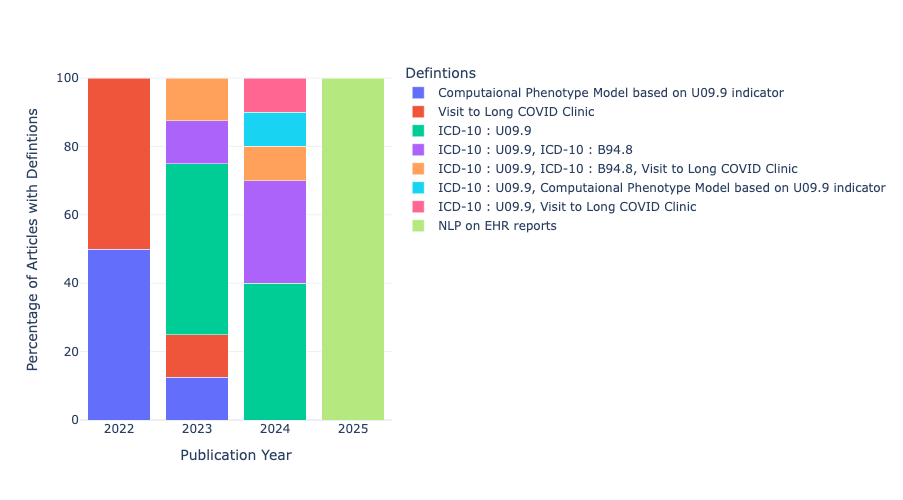

In [11]:
fig.show()

In [12]:
profile_report = ProfileReport(pdata, title = "Group Data Profiling")

In [13]:
profile_report.to_file("Outputs/Group Data Profiling.html")

Summarize dataset:  20%|▏| 2/10 [00:00<00:00, 67.43it/s, Describe variable: Perc
Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00, 654.34it/s]
